Data Exploration:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()

Saving heart_disease.csv to heart_disease.csv


In [3]:
data=pd.read_csv('heart_disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [4]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [7]:
data.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [8]:
correlation=data.corr(numeric_only=True)
correlation

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.029898,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.024365,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,0.024365,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.437577,1.000000


<Axes: >

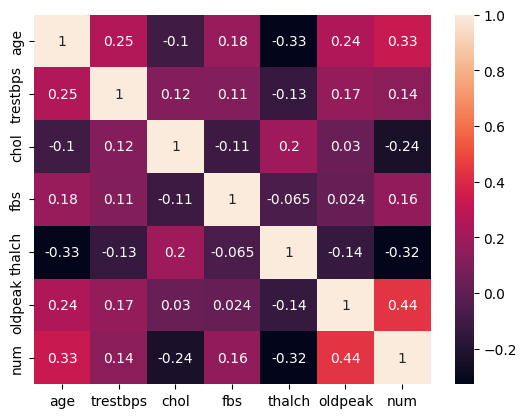

In [9]:
sns.heatmap(correlation,annot=True)

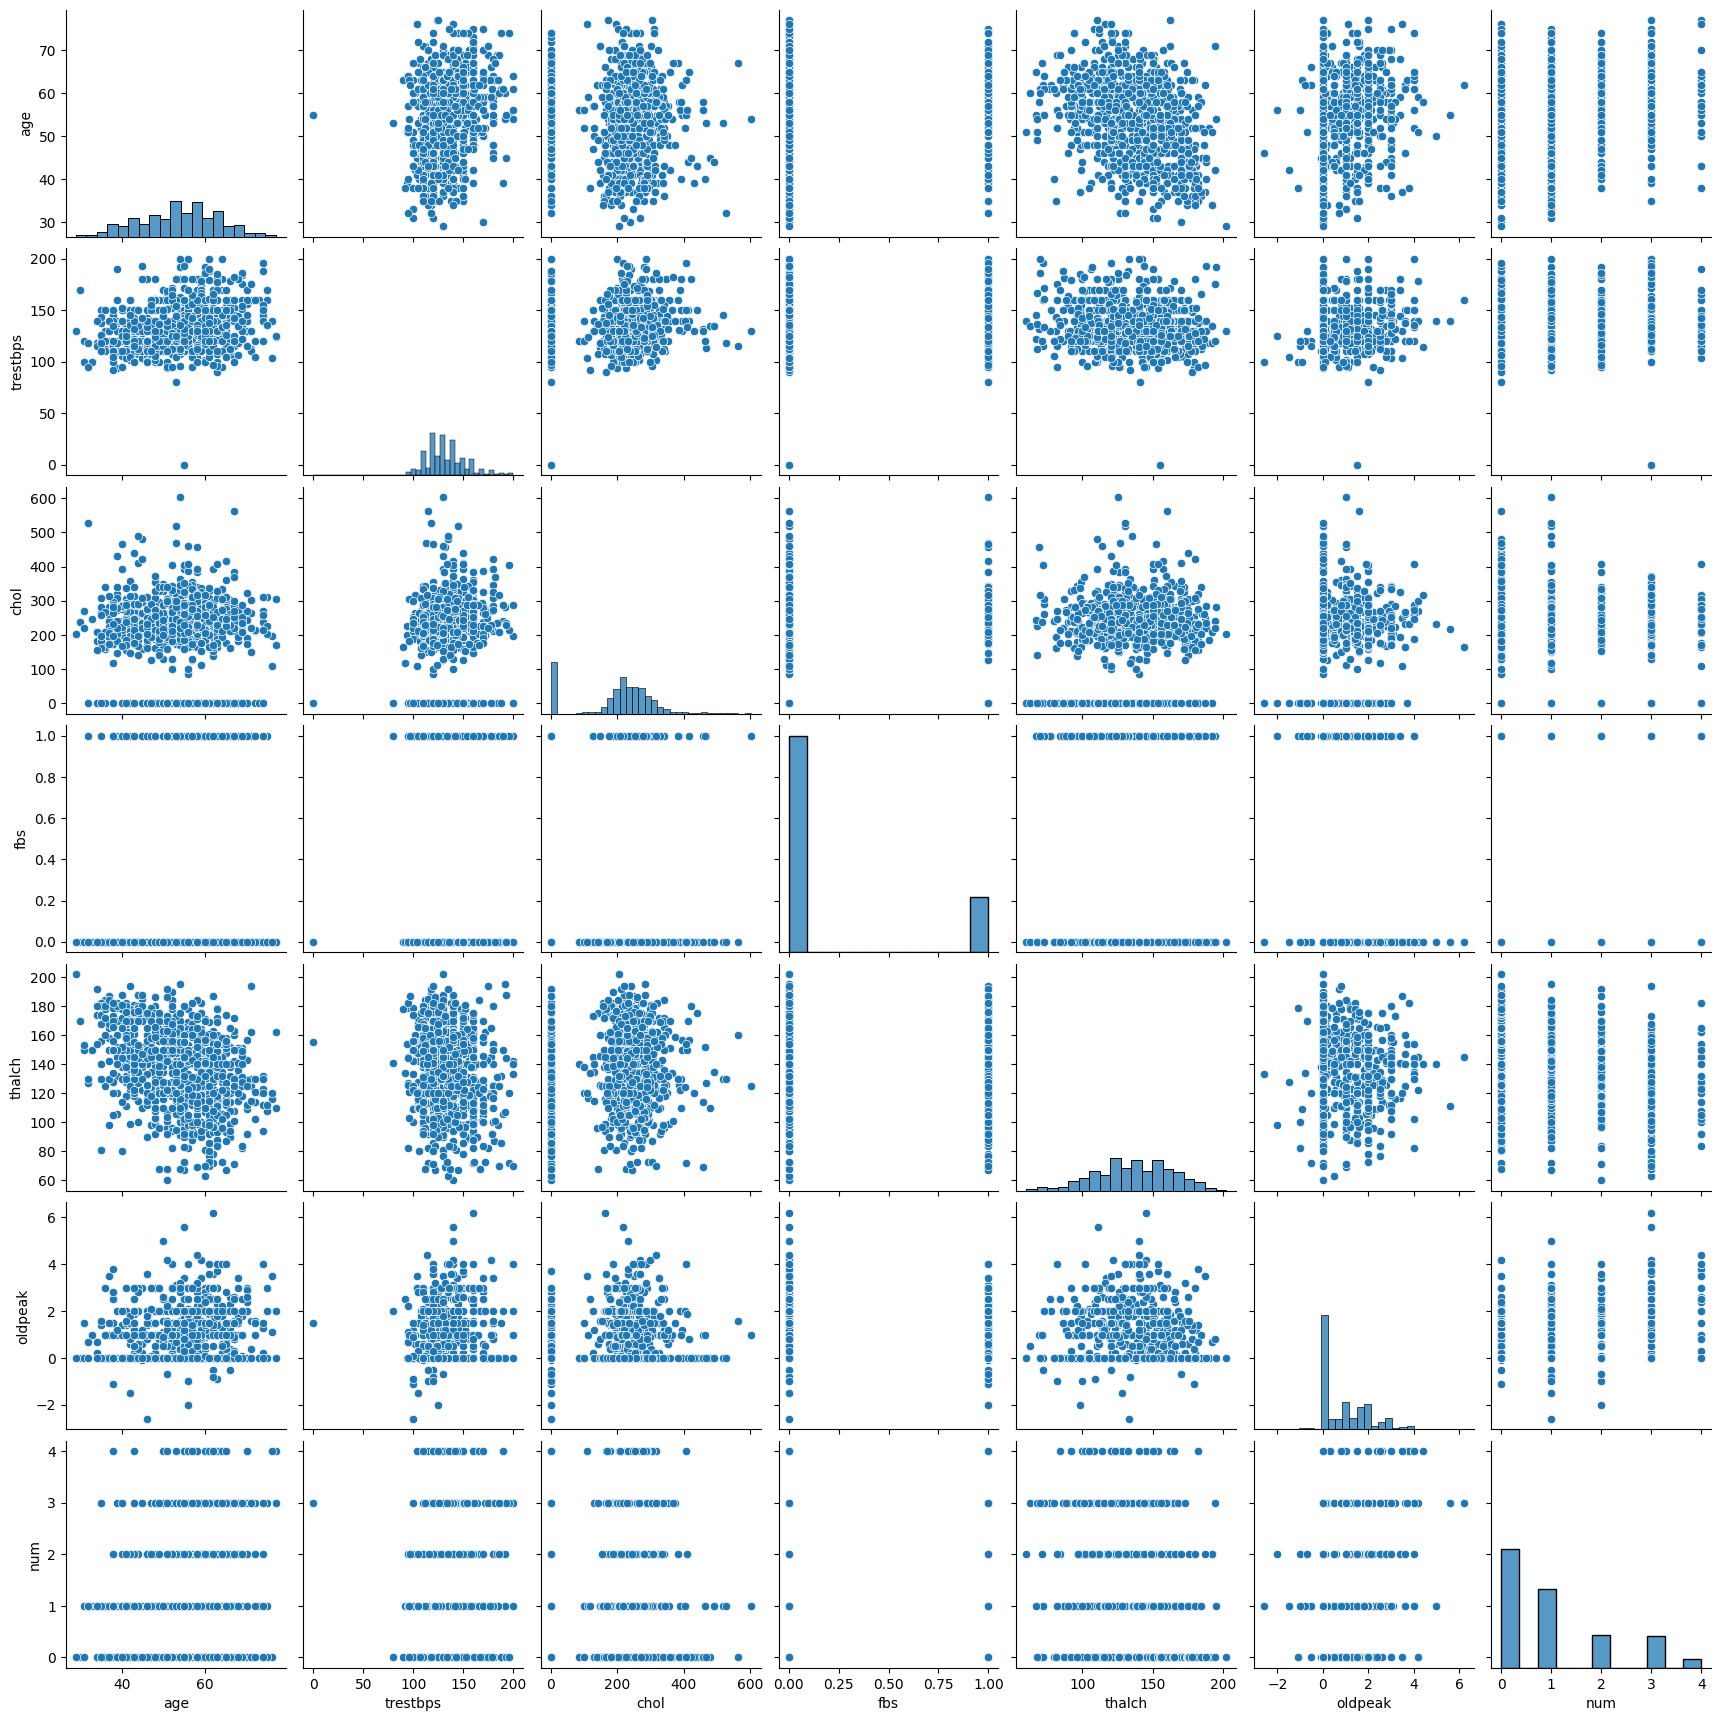

In [10]:
sns.pairplot(data)

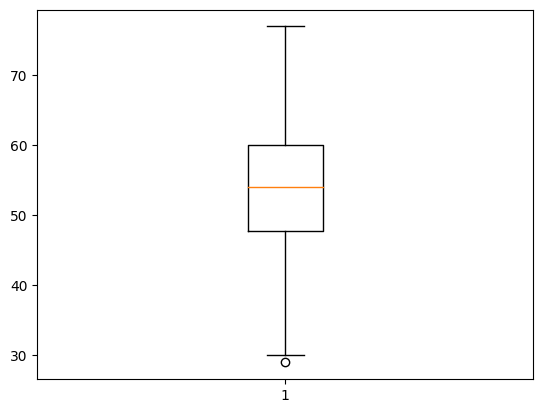

In [11]:
plt.boxplot(data['age'])
plt.show()

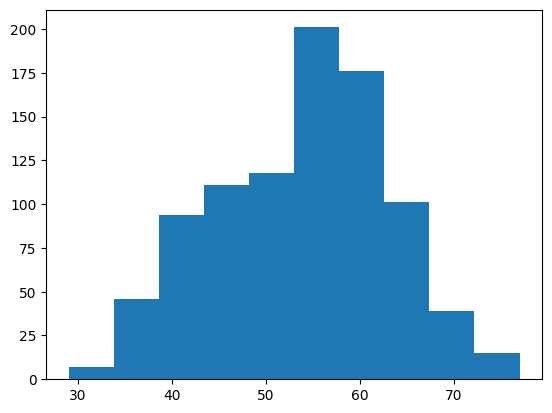

In [12]:
plt.hist(data['age'],bins=10)
plt.show()

Decision Tree Classification:

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
data=pd.read_csv("heart_disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [14]:
# Split the data into features (X) and target variable (y)
x=data.drop(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch','exang', 'oldpeak', 'slope', 'thal', 'num'],axis=1)
y=data['age']
x,y

(     age
 0     63
 1     41
 2     57
 3     52
 4     57
 ..   ...
 903   53
 904   62
 905   56
 906   56
 907   57
 
 [908 rows x 1 columns],
 0      63
 1      41
 2      57
 3      52
 4      57
        ..
 903    53
 904    62
 905    56
 906    56
 907    57
 Name: age, Length: 908, dtype: int64)

In [15]:
import pandas as pd

# Load the CSV file
data_nan= pd.read_csv("heart_disease.csv")

# Remove rows with NaN values
data= data.dropna()

# Save the cleaned data to a new CSV file
data.to_csv('cleaned_file.csv', index=False)
data


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,FALSE,0.0,flat,reversable defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,TRUE,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4


In [16]:
# Handle categorical variables: convert them into numerical values
# You may use LabelEncoder or OneHotEncoder depending on your preference and the data
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [17]:
# Split the data into training and testing sets
#training=80%
#test=20%
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x,y

(     age
 0     63
 1     41
 2     57
 3     52
 4     57
 ..   ...
 903   53
 904   62
 905   56
 906   56
 907   57
 
 [908 rows x 1 columns],
 0      63
 1      41
 2      57
 3      52
 4      57
        ..
 903    53
 904    62
 905    56
 906    56
 907    57
 Name: age, Length: 908, dtype: int64)

In [18]:
# Initialize the decision tree classifier
clf=DecisionTreeClassifier()
# Train the classifier on the training data
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
# Predict the target variable for the testing set
y_pred=clf.predict(x_test)
y_pred

array([63, 58, 41, 61, 54, 67, 60, 48, 53, 60, 52, 56, 42, 41, 45, 58, 39,
       49, 50, 61, 54, 42, 51, 70, 57, 72, 51, 66, 54, 41, 51, 61, 51, 46,
       52, 46, 44, 69, 49, 61, 39, 39, 70, 43, 53, 62, 48, 41, 40, 55, 63,
       62, 54, 56, 53, 47, 64, 57, 39, 65, 50, 44, 56, 36, 45, 52, 58, 46,
       65, 37, 47, 62, 50, 43, 41, 53, 54, 49, 51, 62, 47, 54, 45, 51, 51,
       54, 51, 54, 58, 58, 38, 57, 48, 37, 59, 57, 58, 52, 39, 37, 46, 55,
       62, 43, 53, 68, 56, 56, 48, 57, 60, 59, 52, 62, 40, 60, 46, 44, 43,
       52, 52, 63, 55, 57, 51, 46, 50, 57, 72, 41, 57, 42, 56, 38, 52, 65,
       52, 61, 55, 38, 58, 36, 52, 61, 63, 62, 62, 44, 62, 43, 64, 54, 56,
       56, 41, 54, 57, 52, 50, 45, 48, 58, 43, 63, 56, 54, 72, 48, 66, 45,
       49, 32, 42, 56, 44, 63, 41, 52, 65, 53, 54, 45])

In [20]:
#Evaluate the performanve of the classifier
classification=classification_report(y_pred,y_test)
classification

'              precision    recall  f1-score   support\n\n          32       1.00      1.00      1.00         1\n          36       1.00      1.00      1.00         2\n          37       1.00      1.00      1.00         3\n          38       1.00      1.00      1.00         3\n          39       1.00      1.00      1.00         5\n          40       1.00      1.00      1.00         2\n          41       1.00      1.00      1.00         8\n          42       1.00      1.00      1.00         4\n          43       1.00      1.00      1.00         6\n          44       1.00      1.00      1.00         5\n          45       1.00      1.00      1.00         6\n          46       1.00      1.00      1.00         6\n          47       1.00      1.00      1.00         3\n          48       1.00      1.00      1.00         6\n          49       1.00      1.00      1.00         4\n          50       1.00      1.00      1.00         5\n          51       1.00      1.00      1.00         9\n       

In [21]:
# Evaluate the performance of the classifier
accuracy = clf.score(x_test,y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 3]])

Hyperparameter Tuning:

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Access the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=10)


Model Evaluation and Analysis:

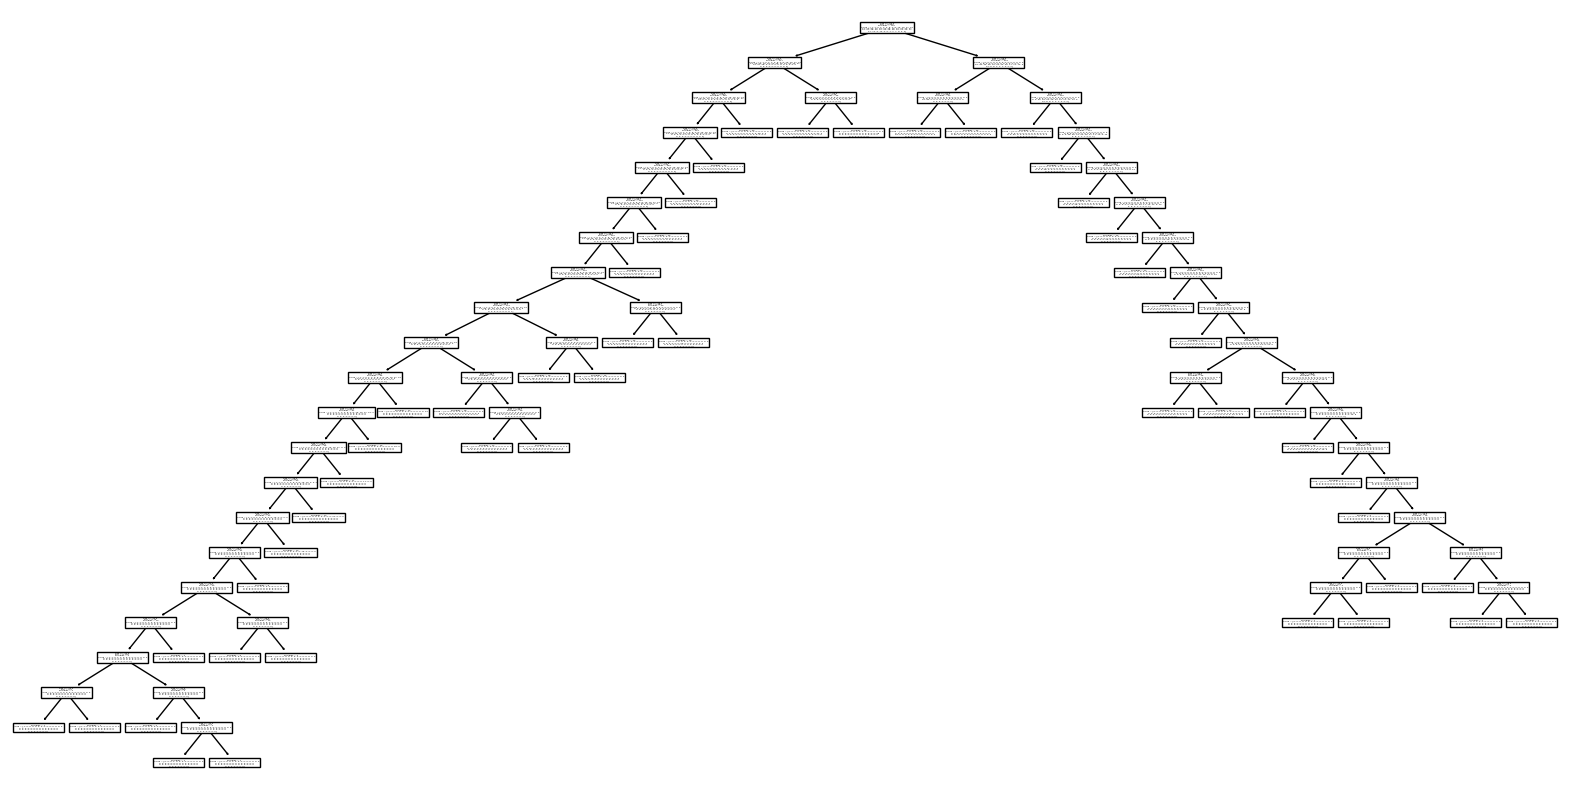

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(clf,feature_names=x.columns)
plt.show()

Interview Questions:

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Ans:Decision trees are powerful and flexible models, and tuning their hyperparameters can significantly impact their performance and behavior.
some of the commom hyperparameters for decision tree model are max_depth,min_samples_split,min_samples_leaf,etc..


### 2.What is the difference between the Label encoding and One-hot encoding?
Ans;
Label encoding and one-hot encoding are both techniques used to convert categorical data into a numerical format that machine learning algorithms can understand. However, they work differently and are suitable for different types of categorical variables

->Label encoding assigns a unique integer to each category in a categorical variable.
->
It works well for ordinal categorical variables, where there is a natural order or ranking among the categories

->One-hot encoding creates binary columns for each category in a categorical variable.
->
It works well for nominal categorical variables, where there is no inherent order among the categories...